# 4. Relações Fuzzy
  * **Produto Cartesiano**
  * **Projeção**
  * **Extensão Cilíndrica**



In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

import numpy as np

## Criação dos conjuntos Fuzzy A e B

In [3]:
# definição dos conjuntos fuzzy - representação por NUMPY ARRAY
A = np.array([[1,0], [2,0.2], [3,0.4], [4,0.6], [5,0.8], [6,1], [7,0.8], [8,0.6],[9,0.4],[10,0.2], [11,0]], dtype=np.float32) # (11, 2)
B = np.array([[5,0], [6,0.2], [7,0.4], [8,0.6], [9,0.8], [10,1], [11,0.8], [12,0.6], [13,0.4], [14,0.2], [15,0]], dtype=np.float32)

In [4]:
# função para plotagem dos conjuntos 2d

def plotar_conjunto_2d(cojuntos, labels, title=None):
    
    color = ['--bo','--go', '--ro', '--yo', '--po']
    
    fig, ax = plt.subplots()

    for i in range(conjuntos.shape[0]):
            plt.plot(cojuntos[i,:,0], cojuntos[i,:,1], color[i], label=labels[i])


    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')
    plt.title(title)
    plt.grid(True)

### Representação 2D de A e B

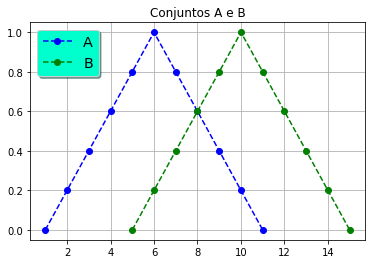

In [5]:
# cojunto dos cojuntos
conjuntos = np.array([A,B], dtype=np.float32)

# plot sets
plotar_conjunto_2d(conjuntos, ['A','B'], 'Conjuntos A e B')

## Produto cartesiano

In [6]:
def produto_cartesiano(A,B):
    """
    1. faz o produto carteziano entre o valor das cordenadas
    2. adiciona o minimo valor da pertinencia a coordenada Z
    """
    produto_cartesiano = np.zeros([A.shape[0],B.shape[0],3], dtype=np.float64)
    
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            
            produto_cartesiano[i][j][0] = A[i][0]
            produto_cartesiano[i][j][1] = B[j][0]
            produto_cartesiano[i][j][2] = min(A[i][1],B[j][1])
            
    return produto_cartesiano
            
        

In [7]:
# obtenho um array 3d a partir dos meus conjuntos fuzzy A e B
new_set_3d = produto_cartesiano(A,B)

### Representação 3D de A e B

In [8]:
def plot_conjuntos_3D(X,Y,Z):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, alpha=0.9, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    # ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

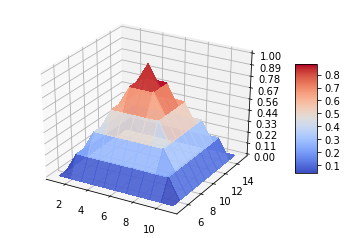

In [9]:
plot_conjuntos_3D(new_set_3d[:,:,0],new_set_3d[:,:,1],new_set_3d[:,:,2])

## Projeção

In [10]:
def plotar_conjunto_projetado(X, Y, Z):
    
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        ax.plot_surface(X, Y, Z, alpha=0.5) #, 

        cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
        cset = ax.contourf(X, Y, Z, zdir='x', offset=0, cmap=cm.coolwarm)
        cset = ax.contourf(X, Y, Z, zdir='y', offset=0, cmap=cm.coolwarm)

        ax.set_xlabel('X')
        ax.set_xlim(-1, 12)
        ax.set_ylabel('Y')
        ax.set_ylim(0, 20)
        ax.set_zlabel('Z')
        ax.view_init(10, 40)
        ax.set_zlim(0, 1)

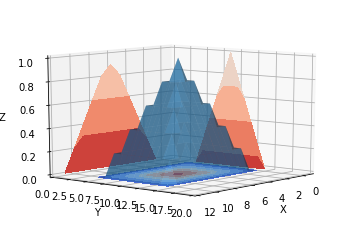

In [12]:
# obtendo as novas coordenadas selecionado a maior pertinência
plotar_conjunto_projetado(np.copy(new_set_3d[:,:,0]),
                np.copy(new_set_3d[:,:,1]),
                np.copy(new_set_3d[:,:,2]))

## Extensão cilíndrica
   * Dado: 
       * $X$ = {a, b, c} 
       * $Y$ = {1, 2, 3}
       * $A$ = 1/a + 0.6/b + 0.3/c
   * Considerando $A$ conjunto fuzzy sobre $X$, a extensão cilíndrica de $A$ para $X x Y$:
   * Relação fuzzy em $X\; x\; Y$ definida por $Â\; =\; A\; x\; Y$ tal que $Â (x,y)\; =\; A (x)\; x Y(y)\; =\; A (x)\; ∧\; 1 =\; A(x)$
       * $CylA$ = $A\; x\; Y$ = 1/(a,1) + 1/(a,2) + 1/(a,3) + 0.6/(b,1) + 0.6/(b,2) + 0.6/(b,3) + 0.3/(c,1) + 0.3/(c,2) + 0.3/(c,3) 

In [20]:
def get_extensao_cilindrica(A,B):
    """
    a coordenada Y, vai ser extraida do conjunto B, que A e B ja foram criado como X e Y
    """
    EC = np.zeros([A.shape[0],B.shape[0],3], dtype=np.float64)
    
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            
            EC[i][j][0] = A[i][0] # coordenada x
            EC[i][j][1] = B[j][0] # coordenada y
            EC[i][j][2] = A[i][1] # pertinencia de A 
            
    return EC   

In [56]:
def plotar_extensao_cilindrica(X, Y, Z):
    
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        ax.plot_surface(X, Y, Z, alpha=0.7) #, 

        #cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
        #cset = ax.contourf(X, Y, Z, zdir='x', offset=0, cmap=cm.coolwarm)
        cset = ax.contourf(X, Y, Z, zdir='y', offset=0, cmap=cm.coolwarm)

        ax.set_xlabel('X')
        ax.set_xlim(0, 12)
        
        ax.set_ylabel('Y')
        ax.set_ylim(0, 20)
        
        ax.set_zlabel('Z')
        ax.set_zlim(0, 1)

### Conjunto Fuzzy A no eixo $X$

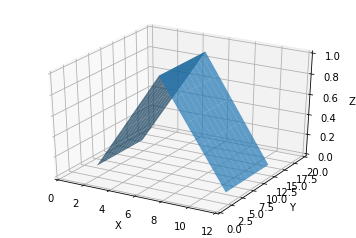

In [57]:
ec = get_extensao_cilindrica(np.copy(A), np.copy(B))

plotar_extensao_cilindrica(ec[:,:,0],ec[:,:,1],ec[:,:,2])

# Referências
   * [create 3-dimensional arrays](https://stackoverflow.com/questions/22981845/3-dimensional-array-in-numpy)
   * [Pot 3d WITH MATPLOTLIB](https://matplotlib.org/1.4.3/mpl_toolkits/mplot3d/tutorial.html)